# Title: Comparative Evaluation of Custom Implementations and scikit-learn Baselines

This notebook reports a concise, reproducible comparison between selected, hand-crafted implementations of common machine learning algorithms and their corresponding references in scikit-learn. The objective is to evaluate the numerical and functional parity of the custom implementations under a clearly stated experimental protocol.

## 1. Introduction

Motivation: Implementing algorithms from first principles is an instructive exercise. However, to validate such implementations it is important to compare them against well-tested libraries. Here we focus on LR as a first example and provide a template that can be extended to additional algorithms.

Research question: Does the custom RL implementation produce predictions and error metrics comparable to scikit-learn's implementation on a controlled synthetic dataset?


In [1]:
from models.models import MyLinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
# 4. Experimental protocol: dataset generation
n_samples = 100
n_features = 3
X = np.random.rand(n_samples, n_features)
true_w = np.array([1.5, -2.0, 0.5])
noise_std = 0.1
y = X @ true_w + noise_std * np.random.randn(n_samples)

# Brief sanity checks on shapes
assert X.shape == (n_samples, n_features)
assert y.shape == (n_samples,)


In [3]:
# 5. Model fitting: custom implementation
my_lr = MyLinearRegression()
my_lr.fit(X, y)
y_pred_my = my_lr.predict(X)
mse_my = mean_squared_error(y, y_pred_my)
print(f"MyLinearRegression MSE: {mse_my:.6e}")


MyLinearRegression MSE: 9.203988e-03


In [4]:
# 6. Model fitting: scikit-learn reference implementation
sk_lr = LinearRegression()
sk_lr.fit(X, y)
y_pred_sk = sk_lr.predict(X)
mse_sk = mean_squared_error(y, y_pred_sk)
print(f"sklearn LinearRegression MSE: {mse_sk:.6e}")


sklearn LinearRegression MSE: 9.203988e-03


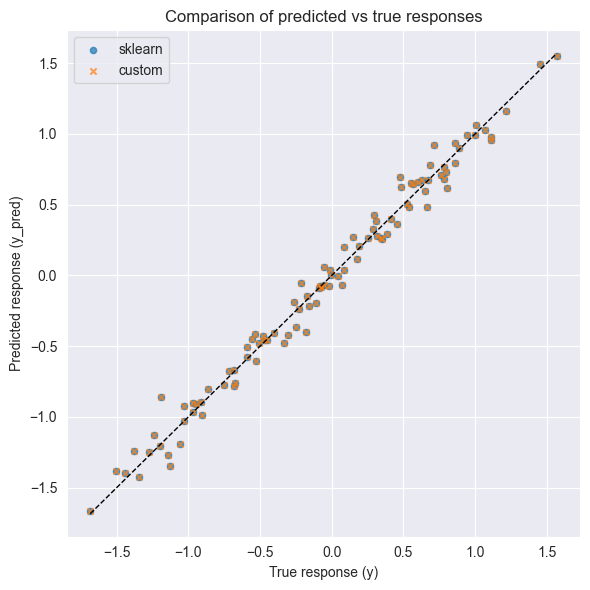

In [5]:
# 7. Results visualization and brief interpretation
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred_sk, alpha=0.7, label='sklearn', s=20)
plt.scatter(y, y_pred_my, alpha=0.7, label='custom', marker='x', s=20)
minv, maxv = y.min(), y.max()
plt.plot([minv, maxv], [minv, maxv], 'k--', linewidth=1)
plt.xlabel('True response (y)')
plt.ylabel('Predicted response (y_pred)')
plt.title('Comparison of predicted vs true responses')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 8. Discussion

The MSE values reported above quantify numerical differences between the two implementations on the same dataset. When both implementations are algebraically equivalent and numerically stable, we expect near-identical MSE values (up to floating-point rounding). Larger discrepancies may indicate a bug, differences in whether an intercept is fitted, or issues with matrix conditioning. In a fuller study one should use multiple random seeds, vary noise levels, and report aggregated statistics (mean ± std).


## 9. Conclusion

This notebook provides a short, reproducible protocol to validate a custom OLS implementation against scikit-learn. It is intended as a template: extend the same structure to other algorithms (Ridge, Logistic Regression, KMeans, PCA, KNN) and include cross-validation or held-out testing when appropriate.
